#FML Assignment

First as was reccomeneded by the brief For those of you using ColabLinks to an external site., we recommend uploading the data to your Google Drive for quick and easy access.)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next Lets imports the necessary libraries for this assignment

In [3]:
# Data handling
import numpy as np
# For numerical operations
import pandas as pd
# For data manipulation and analysis

# Google Colab specific
from google.colab import files
# For file upload in Google Colab

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
from sklearn.linear_model import LogisticRegression
# Logistic Regression
from sklearn.linear_model import Perceptron
# Perceptron
from sklearn.neural_network import MLPClassifier
# Multi-Layer Perceptron
from sklearn.svm import SVC as SVM
# Support Vector Machine (SVM)

# Preprocessing and evaluation
from sklearn.decomposition import PCA
# Principal Component Analysis for dimensionality reduction
from sklearn.impute import SimpleImputer
# For handling missing values
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# For evaluation metrics and visualization
from sklearn.model_selection import train_test_split
# For splitting data into training and test sets
from sklearn.model_selection import GridSearchCV
# For tuning
from sklearn.preprocessing import StandardScaler
# For feature scaling

# For graphing
import matplotlib.pyplot as plt

Now load the data from my google drive

In [4]:
training2_path = '/content/drive/My Drive/Projects/FML/training2.csv'
training1_path = '/content/drive/My Drive/Projects/FML/training1.csv'
test_path = '/content/drive/My Drive/Projects/FML/test.csv'
sample_valid_predictions_path = '/content/drive/My Drive/Projects/FML/sample_valid_predictions.csv'


Load data into DataFrame

In [5]:
training2_df = pd.read_csv(training2_path)
training1_df = pd.read_csv(training1_path)
test_df = pd.read_csv(test_path)
sample_valid_predictions_df = pd.read_csv(sample_valid_predictions_path)

Lets go through the data provided

In [6]:
print(training1_df.head())

       CNNs   CNNs.1   CNNs.2   CNNs.3    CNNs.4   CNNs.5  CNNs.6  CNNs.7  \
0  0.000000  0.44582  1.00770  0.16655  0.000000  0.08548     0.0     0.0   
1  0.000000  0.00000  0.00000  0.26019  1.234300  0.00000     0.0     0.0   
2  0.943630  0.00000  0.00000  0.14180  0.070290  0.00000     0.0     0.0   
3  0.019543  0.00000  0.00000  0.00000  0.000000  0.00000     0.0     0.0   
4  0.000000  0.00000  0.13067  0.00000  0.006485  0.20774     0.0     0.0   

    CNNs.8   CNNs.9  ...  GIST.376  GIST.377  GIST.378  GIST.379  GIST.380  \
0  1.22590  1.65000  ...  0.032443  0.037986  0.029998  0.008660  0.034269   
1  0.00000  0.25666  ...  0.030867  0.050679  0.021178  0.016048  0.047683   
2  0.39032  0.00000  ...  0.010313  0.031747  0.036008  0.004851  0.033030   
3  0.00000  0.00000  ...  0.011666  0.015680  0.018619  0.005827  0.032792   
4  0.13497  1.82980  ...  0.027669  0.028282  0.004130  0.030918  0.035200   

   GIST.381  GIST.382  GIST.383  label  confidence  
0  0.010365  0.

In [7]:
print(training2_df.head())

   CNNs  CNNs.1   CNNs.2    CNNs.3  CNNs.4   CNNs.5  CNNs.6   CNNs.7   CNNs.8  \
0   0.0     0.0  0.00000       NaN     0.0  0.00000    0.00  0.00000  0.33607   
1   0.0     0.0  0.00000  0.000000     0.0      NaN    0.00  0.00000  0.00000   
2   0.0     NaN  0.00000  0.080498     NaN  0.00000    0.00      NaN  0.00000   
3   0.0     0.0  0.39567  0.000000     0.0  0.00000    0.00      NaN  0.00000   
4   NaN     NaN      NaN  0.037334     0.0  0.90437    1.17  0.40552  0.00000   

    CNNs.9  ...  GIST.376  GIST.377  GIST.378  GIST.379  GIST.380  GIST.381  \
0  1.58840  ...  0.036742  0.012381       NaN  0.053308  0.026501  0.005391   
1  2.25540  ...  0.043143  0.019345  0.016736  0.008209  0.023059       NaN   
2  0.00000  ...  0.039189  0.027310  0.038010  0.003747  0.016547       NaN   
3  0.00000  ...  0.020592  0.044585  0.032217  0.054913  0.035068  0.021064   
4  0.21256  ...  0.003779  0.006411       NaN  0.003991  0.012906  0.008374   

   GIST.382  GIST.383  label  confiden

In [8]:
print(test_df.head())

      CNNs  CNNs.1  CNNs.2  CNNs.3   CNNs.4  CNNs.5  CNNs.6  CNNs.7   CNNs.8  \
0      NaN  0.2334     0.0     NaN  0.79188  0.0000     NaN  0.0000  0.43900   
1  0.45386  0.0000     NaN     NaN  0.00000  1.1775     0.0  0.0000  0.42297   
2  0.00000  0.0000     0.0     0.0  0.00000  0.0000     0.0  0.0000  0.00000   
3  0.22014     NaN     0.0     NaN  0.88192  1.0936     NaN  0.0000  0.00000   
4      NaN  0.0000     NaN     NaN  0.00000  0.0000     0.0  1.7938  0.00000   

    CNNs.9  ...  GIST.374  GIST.375  GIST.376  GIST.377  GIST.378  GIST.379  \
0  0.00000  ...  0.009773       NaN  0.011548       NaN  0.017014       NaN   
1  2.02510  ...  0.009820  0.026096  0.039678       NaN  0.057236  0.023440   
2  0.31986  ...       NaN       NaN  0.026954  0.050490       NaN       NaN   
3  0.00000  ...  0.007899  0.023398       NaN  0.022786       NaN  0.007288   
4  0.00000  ...  0.012921       NaN  0.019792  0.019010  0.003771  0.003214   

   GIST.380  GIST.381  GIST.382  GIST.383  


In [9]:
print(sample_valid_predictions_df.head())

   prediction
0           1
1           0
2           1
3           1
4           1


Summary statistics and data types

In [10]:
print(training1_df.describe())
print(training1_df.info())

             CNNs      CNNs.1      CNNs.2      CNNs.3      CNNs.4      CNNs.5  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.147975    0.192618    0.243674    0.225707    0.332345    0.173724   
std      0.241522    0.467353    0.462136    0.451655    0.575747    0.412247   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.242705    0.054127    0.333905    0.258120    0.486308    0.113345   
max      1.438100    3.316100    3.464100    3.176100    2.581900    3.110600   

           CNNs.6      CNNs.7      CNNs.8      CNNs.9  ...    GIST.376  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.131605    0.172648    0.267928    0.320420  ...    0.026383   
std      0.318939    0.450149    0.418593    0.5

In [11]:
print(training2_df.describe())
print(training2_df.info())

              CNNs       CNNs.1       CNNs.2       CNNs.3       CNNs.4  \
count  2193.000000  2202.000000  2222.000000  2220.000000  2215.000000   
mean      0.163193     0.149545     0.209289     0.235386     0.374014   
std       0.255546     0.383432     0.398480     0.422127     0.614665   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.270750     0.023662     0.273825     0.343488     0.567905   
max       1.775800     4.358600     3.318400     3.099000     3.576500   

            CNNs.5       CNNs.6       CNNs.7       CNNs.8       CNNs.9  ...  \
count  2196.000000  2212.000000  2205.000000  2207.000000  2203.000000  ...   
mean      0.208174     0.119356     0.157800     0.253927     0.306417  ...   
std       0.429552     0.283421     0.385871     0.398452     0.506589  ...   
min       0.00000

Checking for null values in datasets (NaNs)

In [12]:
print(training2_df.isnull().sum())

CNNs          557
CNNs.1        548
CNNs.2        528
CNNs.3        530
CNNs.4        535
             ... 
GIST.381      537
GIST.382      521
GIST.383      568
label           0
confidence      0
Length: 3458, dtype: int64


Replace NaNs in the Training2 & test



In [13]:
imputer = SimpleImputer(strategy='mean')
# imputer = SimpleImputer(strategy='median')
training2_df[:] = imputer.fit_transform(training2_df[:])
test_df[:] = imputer.fit_transform(test_df[:])

DataFrames into arrays

In [14]:
training1 = training1_df.values
training2 = training2_df.values
test = test_df.values
sample_valid_predictions = sample_valid_predictions_df.values

Output the shapes

In [15]:
print(f"training1 shape: {training1.shape}")

training1 shape: (400, 3458)


In [16]:
print(f"training2 shape: {training2.shape}")

training2 shape: (2750, 3458)


In [17]:
print(f"test shape: {test.shape}")

test shape: (1000, 3456)


In [18]:
print(f"sample shape: {sample_valid_predictions.shape}")

sample shape: (1000, 1)


Divide data, the data you are given for each photo consists of 3456 features. 3072 of these were extracted from a deep Convolutional Neural Network (CNN) [1], and the remaining 384 are gist features

In [19]:
# First CNN
training1_CNN = training1[:, 0:3072]
training2_CNN = training2[:, 0:3072]

In [20]:
# Second GIST
training1_GIST = training1[:,3072:3456]
training2_GIST = training2[:,3072:3456]

In [21]:
# Both features
training1_BOTH = training1[:, 0:3456]
training2_BOTH = training2[:, 0:3456]

We'll also divide up classes & cofidence

In [22]:
# Classes
training1_Class = training1[:,3456:3457]
training2_Class = training2[:,3456:3457]
# Confidence
training1_Confidence = training1[:,3457:3458]
training2_Confidence = training2[:,3457:3458]

Now to join the data up through concatenation.

In [23]:
training_CNN = np.concatenate((training1_CNN, training2_CNN))
training_GIST = np.concatenate((training1_GIST, training2_GIST))
training_BOTH = np.concatenate((training1_BOTH, training2_BOTH))
training_Class = np.concatenate((training1_Class, training2_Class))
training_Confidence = np.concatenate((training1_Confidence, training2_Confidence))

Again Output shapes

In [24]:
print("CNN shape:",training_CNN.shape)

CNN shape: (3150, 3072)


In [25]:
print("GIST shape:",training_GIST.shape)

GIST shape: (3150, 384)


In [26]:
print("BOTH features shape:",training_BOTH.shape)

BOTH features shape: (3150, 3456)


In [27]:
print("Class shape:",training_Class.shape)

Class shape: (3150, 1)


In [28]:
print("Confidence shape:",training_Confidence.shape)

Confidence shape: (3150, 1)


The class label could be considered certain, and a confidence of 1 was written down. If they didn't all agree, then the classification decided on by the majority was assigned, but with a confidence of only 0.66.This wont work for us so we will filter them down.

In [29]:
# A set Threshold to filter
Threshold = 0.99
# A mask to identify the rows where the confidence value is greater than or equal to the threshold.
Mask = training_Confidence >= Threshold
Mask = Mask.squeeze()

Now to ensure that the models will only use the most reliable points

In [30]:
Masked_CNN = training_CNN[Mask]
Masked_Class = training_Class[Mask]

Output the shapes

In [31]:
print(Masked_CNN.shape[0])

825


In [32]:
print(Masked_Class.shape[0])

825


Now to split the masked data into a training and validation set

In [33]:
# Using sklearn train test split
X_train, X_val, Y_train, Y_val = train_test_split(Masked_CNN, Masked_Class, test_size=0.2, random_state=50)

To ensure features contibute equally the sets will be standardised

In [34]:
# Using sklearn StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)

StandardScaler()

In [35]:
X_train = Scaler.transform(X_train)
X_val = Scaler.transform(X_val)

In order to improve peformance we'll reduce the number of features.

In [36]:
# Using Principal Component Analysis
pca_model = PCA(n_components=0.8, random_state=50)
X_train = pca_model.fit_transform(X_train)
X_val = pca_model.transform(X_val)

Now for the testing data


In [37]:
testing_predict = test[:, 0:3072]
testing_predict = Scaler.transform(testing_predict)
testing_predict = pca_model.transform(testing_predict)

#Training the different models

You may make use of any classifier, such as: single-layer perceptron, multi-layer perceptron, SVM, random forest, logistic regression, etc. You are not required to code classifiers from scratch

Perceptron

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy: 0.7696969696969697
Iterations: 22


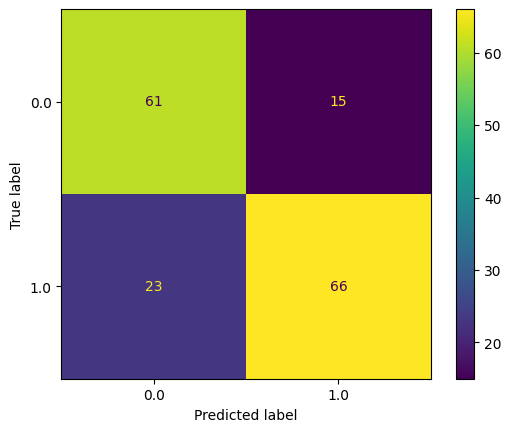

In [38]:
# Initialize the Perceptron model
perceptron_model = Perceptron()

# Train the Perceptron model on the training data
perceptron_model.fit(X_train, Y_train)

# Make predictions on the validation data
Y_val_predictions = perceptron_model.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(Y_val, Y_val_predictions)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=perceptron_model.classes_)

# Display the results
print(f"Validation Accuracy: {val_accuracy}")
print(f"Iterations: {perceptron_model.n_iter_}")

# Visualize the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=perceptron_model.classes_)
confusion_matrix_display.plot()

# Store the accuracy for later use
perceptron_accuracy = val_accuracy

Multilayer Perceptron

Validation Accuracy: 0.7818181818181819
Iterations: 17


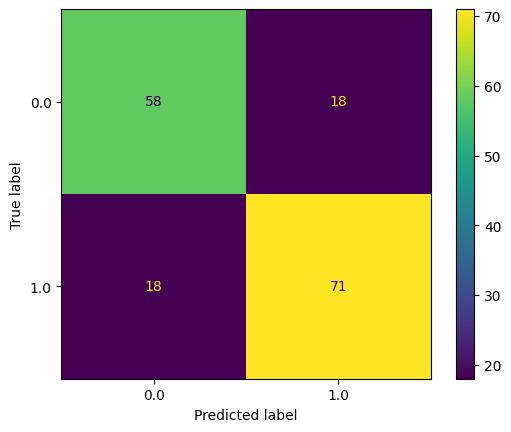

In [39]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'activation': ['relu', 'tanh'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'momentum': [0.6, 0.8, 0.9],
#     'early_stopping': [True],
#     'validation_fraction': [0.1, 0.2, 0.3]
# }

# # Initialize the MLPClassifier
# mlp = MLPClassifier()

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit GridSearchCV on the training data
# grid_search.fit(X_train, Y_train.ravel())

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the MLPClassifier with the best parameters
# best_mlp_classifier = grid_search.best_estimator_

# # Make predictions on the validation data
# Y_val_predictions = best_mlp_classifier.predict(X_val)

# # Calculate the accuracy of the model on the validation data
# val_accuracy = accuracy_score(Y_val, Y_val_predictions)
# print(f"Validation Accuracy: {val_accuracy}")

# # Compute the confusion matrix
# confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=best_mlp_classifier.classes_)

# # Visualize the confusion matrix
# confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=best_mlp_classifier.classes_)
# confusion_matrix_display.plot()

# Initialize the Multilayer Perceptron classifier
# mlp_classifier = MLPClassifier(
#     activation="relu",
#     solver="sgd",
#     alpha=0.1,
#     learning_rate_init=0.1,
#     momentum=0.8,
#     early_stopping=True,
#     validation_fraction=0.6
# )
mlp_classifier = MLPClassifier(
    activation="relu",
    solver="sgd",
    alpha=0.01,
    learning_rate_init=0.01,
    momentum=0.6,
    early_stopping=True,
    validation_fraction=0.1
)

# Train the Multilayer Perceptron classifier on the training data
mlp_classifier.fit(X_train, Y_train.ravel())

# Make predictions on the validation data
Y_val_predictions = mlp_classifier.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(Y_val, Y_val_predictions)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=mlp_classifier.classes_)

# Display the results
print(f"Validation Accuracy: {val_accuracy}")
print(f"Iterations: {mlp_classifier.n_iter_}")

# Visualize the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mlp_classifier.classes_)
confusion_matrix_display.plot()

# Store the accuracy for later use
mlp_accuracy = val_accuracy

SVM

Validation Accuracy: 0.7272727272727273


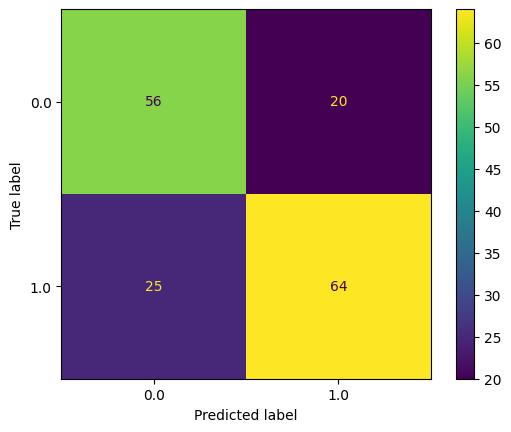

In [50]:
# Initialize the SVM classifier
svm_classifier = SVM(kernel='linear', C=1, random_state=50)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train.ravel())

# Make predictions on the validation data
Y_val_predictions = svm_classifier.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(Y_val, Y_val_predictions)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=svm_classifier.classes_)

# Display the results
print(f"Validation Accuracy: {val_accuracy}")

# Visualize the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=svm_classifier.classes_)
confusion_matrix_display.plot()

# Store the accuracy for later use
svm_accuracy = val_accuracy

Random forest

Validation Accuracy: 0.7333333333333333


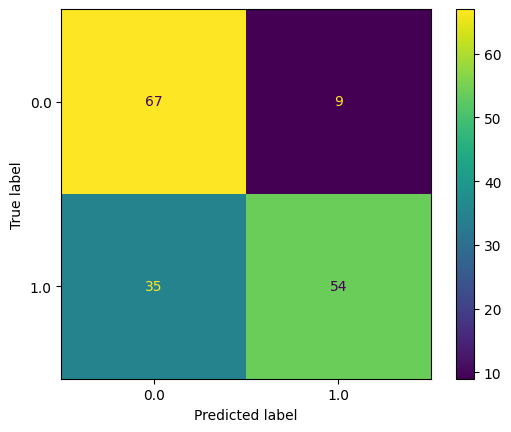

In [41]:
# Initialize the Random Forest Classifier with specified hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=500,
    criterion="log_loss",
    max_depth=5
)

# Train the Random Forest Classifier on the training data
random_forest_model.fit(X_train, Y_train.ravel())

# Make predictions on the validation data
Y_val_predictions = random_forest_model.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(Y_val.ravel(), Y_val_predictions)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=random_forest_model.classes_)

# Display the results
print(f"Validation Accuracy: {val_accuracy}")

# Visualize the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=random_forest_model.classes_)
confusion_matrix_display.plot()

# Store the accuracy for later use
RF_accuracy = val_accuracy

2.6 Training with Logistic Regression

Validation Accuracy: 0.7818181818181819
Iterations: 6


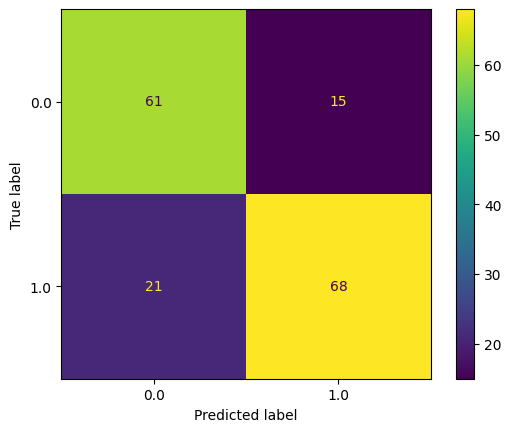

In [42]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(
    solver="liblinear",
    penalty="l2",
    C=0.02,
    max_iter=400
)

# Train the Logistic Regression model on the training data
logistic_regression_model.fit(X_train, Y_train.ravel())

# Make predictions on the validation data
Y_val_predictions = logistic_regression_model.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(Y_val.ravel(), Y_val_predictions)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_val, Y_val_predictions, labels=logistic_regression_model.classes_)

# Display the results
print(f"Validation Accuracy: {val_accuracy}")
print(f"Iterations: {logistic_regression_model.n_iter_[0]}")

# Visualize the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=logistic_regression_model.classes_)
confusion_matrix_display.plot()

# Store the accuracy for later use
LR_accuracy = val_accuracy

# Hyper-Parameter tuning

Random Forest

In [43]:
# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)


In [44]:
# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, Y_train)


In [45]:
# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, Y_train)


# Compare Results

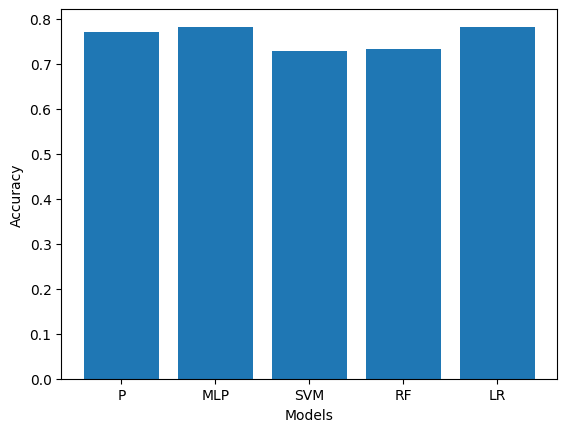

In [47]:
categories = ['P', 'MLP', 'SVM', 'RF', 'LR']
values = [perceptron_accuracy, mlp_accuracy, svm_accuracy, RF_accuracy, LR_accuracy]

# Create the bar graph
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the graph
plt.show()


# Creating the predictions csv file

Class predictions for the test data. This must be in exactly the same format as the provided example file sample_valid_predictions.csv and must be named predictions.csv.

In [48]:
test_predictions = logistic_regression_model.predict(testing_predict)

In [49]:
predictions_df = pd.DataFrame(test_predictions, columns=['prediction'])
predictions_df.to_csv('predictions.csv', index=False)